# Modelling

## Imports

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential, layers, models
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import EarlyStopping
import h5py as h5
import matplotlib.pyplot as plt

2023-06-12 11:42:14.748527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 11:42:14.863332: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-12 11:42:15.304796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-12 11:42:15.304864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

## y_train and y_test

In [2]:
y_dataframe = pd.read_csv('../data/y_dataframe.csv', index_col=0)

In [3]:
y_dataframe

In [4]:
y_train = y_dataframe.iloc[0:8859].to_numpy()

In [5]:
y_test = y_dataframe.iloc[8859:9842].to_numpy()

In [6]:
y_train.shape

In [7]:
y_test.shape

## X_train and X_test

In [30]:
X_train = np.load('../data/nsd_train_fmriavg_nsdgeneral_sub1.npy')

In [31]:
X_test = np.load('../data/nsd_test_fmriavg_nsdgeneral_sub1.npy')

In [10]:
X_train.shape

In [11]:
X_test.shape

In [12]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [13]:

model = models.Sequential()

model = Sequential([layers.Dense(100, input_shape = (15724,), activation = "relu"),
                  layers.Dense(100, activation = "relu"),
                    layers.Dropout(0.4),
                  layers.Dense(200, activation = "relu"),
                    layers.Dropout(0.4),
                  layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.4),
                    layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.4),
                    layers.Dense(1000, activation = "relu"),
                    layers.Dropout(0.4),
                    layers.Dense(2000, activation = "relu"),
                  layers.Dense(2637, activation = "sigmoid")])


# model.add(layers.Dense(2637, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
             metrics = ['accuracy'])

In [15]:
es = EarlyStopping(patience=7,restore_best_weights = True)

history = model.fit(X_train_scaled, y_train, validation_split=0.1, batch_size = 32, epochs = 40, callbacks=[es])

In [ ]:
# history = model.fit(X_train_scaled,
#                     y_train, 
#                     validation_split = 0.1,
#                     batch_size = 32,
#                     epochs=30)

In [ ]:
answer = model.predict(X_train_scaled[60].reshape(1,-1))

In [ ]:
answer[answer>0.1]

In [ ]:
answer_idxs = np.argpartition(answer[0],-4)[-4:]

In [ ]:
answer_idxs

In [ ]:
labels = y_dataframe.columns[1:]

In [ ]:
labels[answer_idxs]

In [ ]:
test_answer = model.predict(X_test_scaled[40].reshape(1,-1))

In [ ]:
test_answer

In [ ]:
test_answer_idxs = np.argpartition(test_answer[0],-4)[-4:]

In [ ]:
test_answer_idxs

In [ ]:
labels[test_answer_idxs]

In [3]:
images_file = h5.File("../data/nsd_stimuli.hdf5", "r")
images = images_file['imgBrick']
stim_list_test=np.load('../data/nsd_test_stim_list1.npy')
stim_list_train=np.load('../data/subj01_nsd_train_stim_list1.npy')
train_caps=np.load('../data/nsd_train_cap_sub1.npy')
test_caps=np.load('../data/nsd_test_cap_sub1.npy')
X_test_dataframe = pd.read_csv('../data/df_test.csv')


In [ ]:
## index_caption = 10
## index2 =stim_list_train[index_caption]
# plt.imshow(images[index2])
# plt.show()

# print('Original captions', train_caps[index_caption])

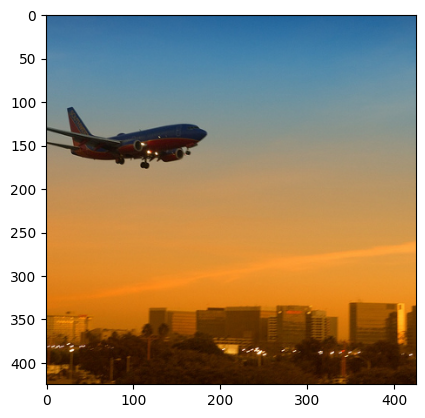

Original captions ['' 'An aeroplane flying in the sky over the buildings at sunset.'
 'An airplane flying in the air above a city.'
 'an airplane flying about many tall buildings and cars ' '']
fMRI array [ 69.         177.         -49.66666794 ... 284.         255.
 434.        ]


In [36]:
x_num=2
test_index=stim_list_test[x_num]
plt.imshow(images[test_index])
plt.show()

print('Original captions', test_caps[x_num])
print('fMRI array', X_test[x_num])


In [25]:
X_test_dataframe

,Image_index,test_caps_processed,fMRI
0,46002,"['cow', 'white', 'grass', 'eat']",[-339.66665649 -236.66667175 13.66666698 ......
1,48617,"['airplane', 'port', 'cloud', 'plane']",[ 277.5 -418. 14.5 ... 122. 436.5 461. ]
2,44980,"['airplane', 'sky', 'build', 'sunset']",[ 69. 177. -49.66666794 ... 28...
3,32625,"['kitchen', 'view', 'middle', 'day']",[ 366.66665649 -412. 42.33333206 ......
4,53052,"['clock', 'center', 'tile', 'star']",[ -49.33333206 -321.66665649 31.33333397 ......
...,...,...,...
977,19672,"['snowy', 'slope', 'ski', 'people']",[878.66668701 259.66665649 51. ... 15...
978,18535,"['giraffe', 'small', 'green', ' ']",[ 531. 104. -336.5 ... -442. 161. 516. ]
979,21318,"['dog', 'lie', 'inside', 'purple']",[255.66667175 -48.66666794 -91.66666412 ... 12...
980,32857,"['ski', 'snowboard', 'man', ' ']",[1133. 331. 385. ... 1360. 1168. 1095.]
